In [4]:
#Predicting the survival of titanic disaster using Python
#In this challenge we are to know what sort of people are likely to survive
# we wants to know which passengers survived the tragedy
#Loading the libraries for my analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns


In [5]:
#Loading the train $ test data set
train_df = pd.read_csv('C:/Users/kaelo/Desktop/train.csv')
test_df =pd.read_csv('C:/Users/kaelo/Desktop/test.csv')



In [6]:
#We wants to know the names of our variables for the train data
print train_df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# The head of the variables for the test data set, but here survival variables is missing here
print test_df.head()

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [8]:
#remove duplicate for the train data
train_df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
test_df.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
## Merging or stacking two dataframes together so that we could clean and vizualize them at ones
#df_new = pd.concat([df,df2], axis=0)

In [11]:
#The dimenstion for the train
train_df.shape


(891, 12)

In [12]:
#The dimention for the testing 
test_df.shape

(418, 11)

In [13]:
# remove rows with dependent variable missing
train_df = train_df.dropna(subset=['Survived'])

In [14]:
# Collect the train data's PassengerIds before dropping it
#id_col = train_df['PassengerId'].values

In [15]:
id2_col=test_df['PassengerId'].values

In [16]:
# delete columns that are not useful for both train and testing
train_df.drop(['Name','Ticket', 'Cabin','PassengerId'], axis=1, inplace=True)
test_df.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

In [17]:
# get column names for train
col_names = train_df.columns.tolist()
print col_names

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [18]:
# get column names
col_names = test_df.columns.tolist()
print col_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [19]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [20]:
# my function for separating different kinds of variables
def variable_type(train_df, nominal_level = 3):
    categorical, numeric, nominal = [],[],[]
    for variable in train_df.columns.values:
        if np.issubdtype(np.array(train_df[variable]).dtype, int) or np.issubdtype(np.array(train_df[variable]).dtype, float):
            if len(np.unique(np.array(train_df[variable]))) <= nominal_level:
                nominal.append(variable)
            else:
                numeric.append(variable)
        else:
            categorical.append(variable)
    return numeric,categorical,nominal
numeric,categorical,nominal = variable_type(train_df)
print "numeric variable:",numeric

numeric variable: ['Age', 'SibSp', 'Parch', 'Fare']


In [21]:
# my function for separating different kinds of variables
def variable_type(test_df, nominal_level = 3):
    categorical, numeric, nominal = [],[],[]
    for variable in test_df.columns.values:
        if np.issubdtype(np.array(test_df[variable]).dtype, int) or np.issubdtype(np.array(test_df[variable]).dtype, float):
            if len(np.unique(np.array(test_df[variable]))) <= nominal_level:
                nominal.append(variable)
            else:
                numeric.append(variable)
        else:
            categorical.append(variable)
    return numeric,categorical,nominal
numeric,categorical,nominal = variable_type(test_df)
print "categorical variable:",categorical

categorical variable: ['Sex', 'Embarked']


In [22]:
# find variables with missing values on train data
#we can see that we both have missing values for Age and Embarked on both train and test data below
for variable in col_names:
    percent = float(sum(train_df[variable].isnull()))/len(train_df.index)
    print variable+":", percent

Pclass: 0.0
Sex: 0.0
Age: 0.198653198653
SibSp: 0.0
Parch: 0.0
Fare: 0.0
Embarked: 0.00224466891134


In [23]:
# find variables with missing values on test data
for variable in col_names:
    percent = float(sum(test_df[variable].isnull()))/len(test_df.index)
    print variable+":", percent

Pclass: 0.0
Sex: 0.0
Age: 0.205741626794
SibSp: 0.0
Parch: 0.0
Fare: 0.00239234449761
Embarked: 0.0


In [24]:
#Using the frequency counts for the categorical variables for the train
#df_new.isnull().any()
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
#We can figure is out that there where more males than females in both the train data
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
## Merging or stacking two dataframes together
#df_new = pd.concat([df,df2], axis=0)

In [27]:
#df.shape

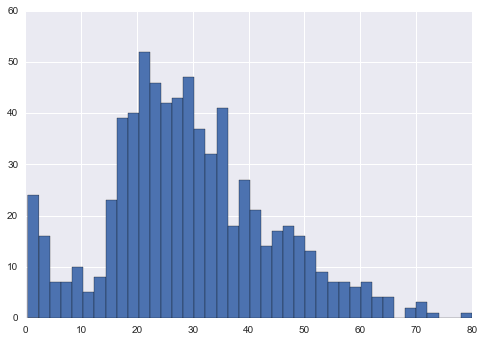

In [28]:
# draw histogram for continuous variable age to check for extreme values we could observe that is a li
train_df['Age'].hist(bins=40)
plt.show()

C:\Users\kaelo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


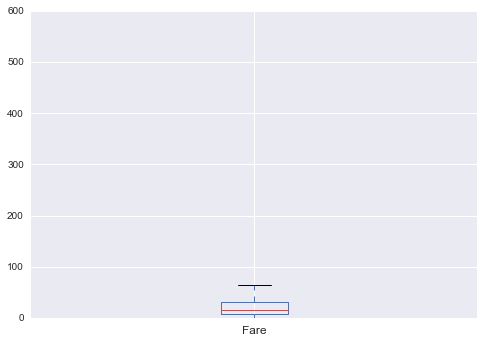

In [29]:
#we use boxplot to identify extreme values for the fare variables
train_df.boxplot(column='Fare')
plt.show()

In [30]:
#gives the summation of Nan in the data for 
#df_new.isnull().sum()

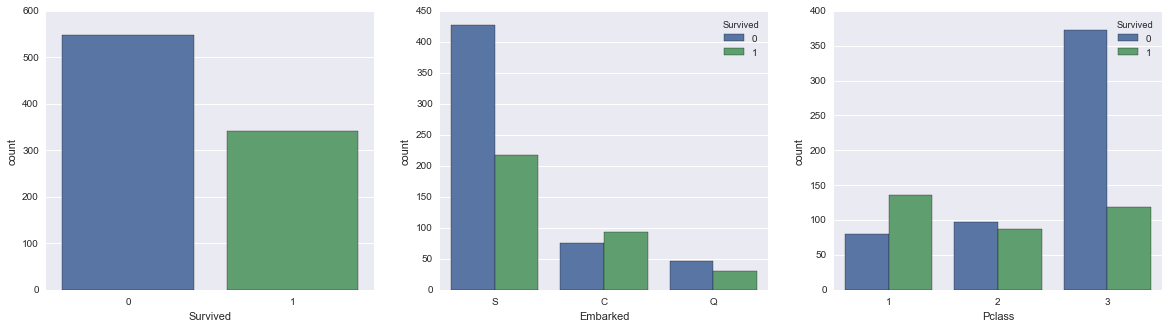

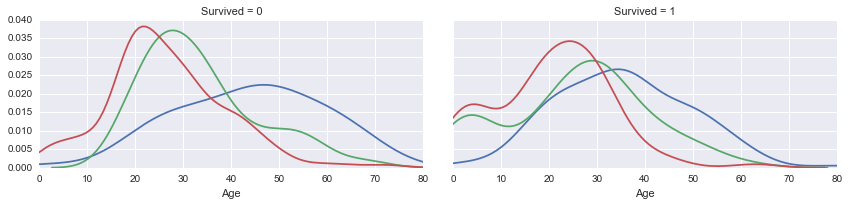

In [31]:
#Exploratory analysis of some variables
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Survived',data=train_df,ax=axes[0])
sns.countplot(x='Embarked',hue='Survived',data=train_df,ax=axes[1])
sns.countplot(x='Pclass',hue='Survived',data=train_df,ax=axes[2])

facet = sns.FacetGrid(train_df,col="Survived",hue='Pclass',aspect=2)
facet.map(sns.distplot,'Age',hist=False)
facet.set(xlim=(0, train_df['Age'].max()))

In [32]:
#gives the summation of Nan in the data for 
#df_new.isnull().sum()

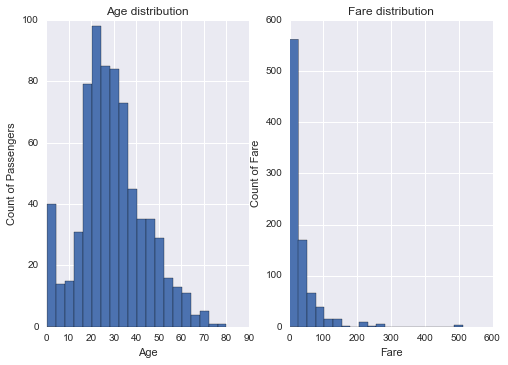

In [33]:
# we figure out that there is a little 
fig = plt.figure()
ax = fig.add_subplot(121)
#ax.hist(df['Age'], bins = 20)
train_df['Age'].hist(bins = 20, ax = ax)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
ax = fig.add_subplot(122)
train_df['Fare'].hist(bins = 20, ax = ax)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Fare')
plt.show()


In [34]:
# Ok I need to set to be nan
col = train_df['Fare']
col[col>500] = np.nan


C:\Users\kaelo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
# Or we can cap
def cap_variable(train_df, variable, num_std):
    upbound = train_df[variable].mean() + num_std * train_df[variable].std()
    train_df[variable] = train_df[variable].clip(upper = upbound)
cap_variable(train_df, 'Fare', 3)

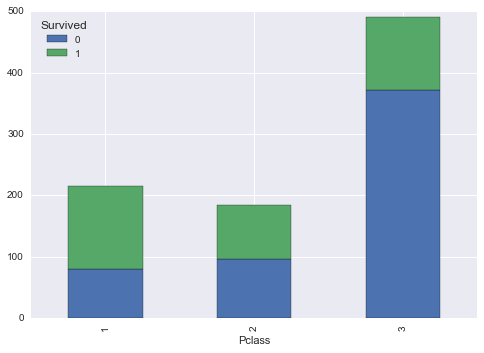

In [36]:
temp = pd.crosstab(train_df.Pclass, train_df.Survived)
temp.plot(kind='bar', stacked=True)
plt.show()


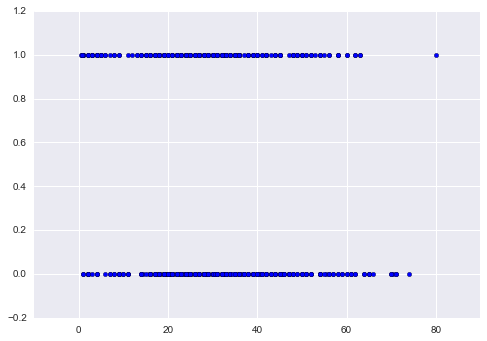

In [37]:
#plt.scatter( df.Fare, df.Survived)
plt.scatter( train_df.Age, train_df.Survived)
plt.show()

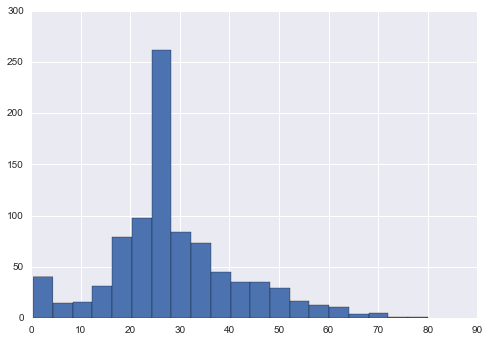

In [38]:
# replace missing values with median and add an indicator
# we can see that the age is normalize now 

train_df['Age_missing'] = np.where(train_df['Age'].isnull(),1,0)
medianAge = train_df.Age.median()
train_df.Age.fillna(medianAge, inplace= True)
train_df.Age.hist(bins=20)
plt.show()


In [39]:
# we create a frequency of embarked 
train_df['Embarked'].fillna(train_df['Embarked'].mode())[:10]

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

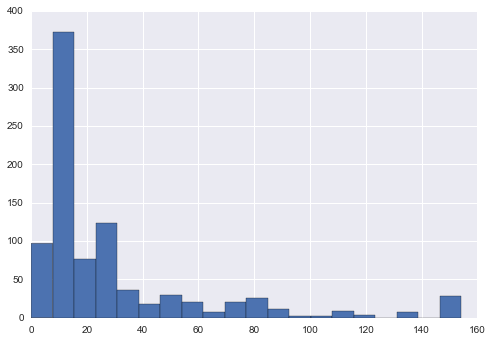

In [40]:

train_df['Fare_missing'] = np.where(train_df['Fare'].isnull(),1,0)
medianFare = train_df.Fare.median()
train_df.Fare.fillna(medianFare, inplace= True)
train_df.Fare.hist(bins=20)
plt.show()

In [41]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_missing,Fare_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,28.899575,0.198653,0.003367
std,0.486592,0.836071,13.019697,1.102743,0.806057,33.785861,0.399212,0.057961
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.695800,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,154.111263,1.000000,1.000000


In [42]:
train_df.shape

(891, 10)

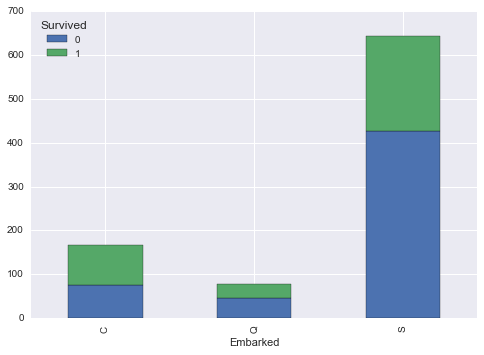

In [43]:
temp = pd.crosstab(train_df.Embarked, train_df.Survived)
temp.plot(kind='bar', stacked=True)
plt.show()

In [44]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_missing,Fare_missing
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,0
5,0,3,male,28.0,0,0,8.4583,Q,1,0
6,0,1,male,54.0,0,0,51.8625,S,0,0
7,0,3,male,2.0,3,1,21.0750,S,0,0
8,1,3,female,27.0,0,2,11.1333,S,0,0
9,1,2,female,14.0,1,0,30.0708,C,0,0


In [45]:
# to comfirm the variables was cleaned and transformed  we are going to drop the embarked for our analysis 
#df.isnull().sum()

In [46]:
#df_new.drop(['Embarked'], axis=1, inplace=True)
#df.describe()

In [47]:
train_df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
Age_missing     0
Fare_missing    0
dtype: int64

In [48]:
train_df.drop(['Embarked','Age_missing','Fare_missing'], axis=1, inplace=True)

In [49]:
#df['Survived'].dtype

In [50]:
#df.drop(['Age_missing','Fare_missing'], axis=1, inplace=True)

In [51]:
# Looking at the train data everything looks good a
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [52]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [53]:
#The distribution of the survived variables
#df['Survived'].hist(bins=20)
#plt.show()

C:\Users\kaelo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


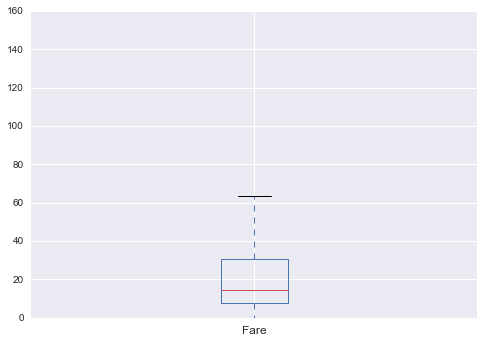

In [54]:
#Using the boxplot to check for extreme values it seems good to me
train_df.boxplot(column='Fare')
plt.show()

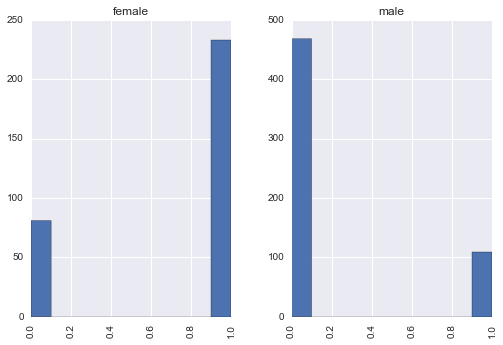

In [55]:
train_df.hist(column='Survived', by= 'Sex')
plt.show()

In [56]:
# let prep the test data
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [57]:
# we do check for the missing in test data
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [58]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

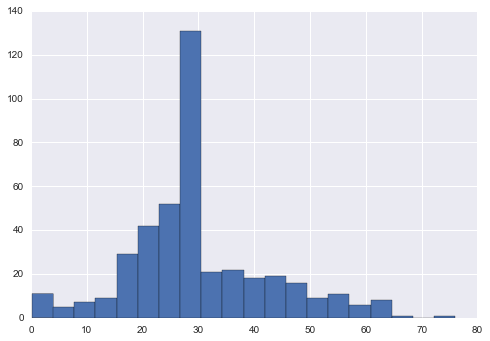

In [59]:
test_df['Age_missing'] = np.where(test_df['Age'].isnull(),1,0)
medianAge = test_df.Age.median()
test_df.Age.fillna(medianAge, inplace= True)
test_df.Age.hist(bins=20)
plt.show()

In [60]:
test_df.shape

(418, 8)

In [61]:
test_df.drop(['Embarked','Age_missing'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
5,3,male,14.0,0,0,9.2250
6,3,female,30.0,0,0,7.6292
7,2,male,26.0,1,1,29.0000
8,3,female,18.0,0,0,7.2292
9,3,male,21.0,2,0,24.1500


C:\Users\kaelo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


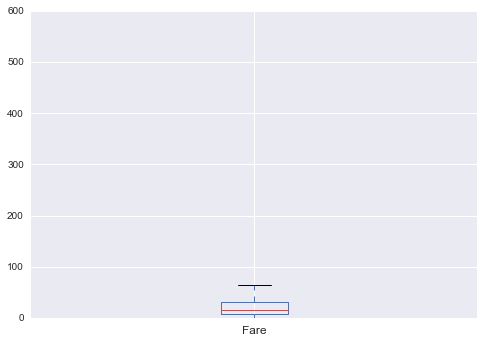

In [62]:
# we trying to check for extreme values we found none at this time
test_df.boxplot(column='Fare')
plt.show()

In [63]:
test_df.drop(['Age_missing','Embarked'], axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
5,3,male,14.0,0,0,9.2250
6,3,female,30.0,0,0,7.6292
7,2,male,26.0,1,1,29.0000
8,3,female,18.0,0,0,7.2292
9,3,male,21.0,2,0,24.1500


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#from sklearn.cross_validation import train_test_split

In [73]:
# define training and testing sets
titanic_target = train_df["Survived"]
titanic_data = train_df.drop("Survived",axis=1)


In [82]:
model = LogisticRegression()
model.fit(titanic_data, titanic_target)
print(model.fit)

TypeError: 'LogisticRegression' object is not callable

In [77]:
print titanic_target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [79]:
print titanic_data.tail(10)

     Pclass     Sex   Age  SibSp  Parch     Fare
881       3    male  33.0      0      0   7.8958
882       3  female  22.0      0      0  10.5167
883       2    male  28.0      0      0  10.5000
884       3    male  25.0      0      0   7.0500
885       3  female  39.0      0      5  29.1250
886       2    male  27.0      0      0  13.0000
887       1  female  19.0      0      0  30.0000
888       3  female  28.0      1      2  23.4500
889       1    male  26.0      0      0  30.0000
890       3    male  32.0      0      0   7.7500
